In [19]:
import pandas as pd
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout
from IPython.display import SVG, Image

In [4]:
# Convenience function for adding links
def add_links(iteritems):
    links = []
    type_count = 0
    current_type = None

    for pair, count in iteritems:
        source, target = pair

        # Track type by grouping samples by "source"
        if source != current_type:
            current_type = source
            type_count += 1
        links.append({'source': source, 'target': target, 'value': count, 'type': type_count})
    return links

def sankey(**value):
    """Show SankeyWidget with default values for size and margins"""
    layout = Layout(width="1200", height="800")
    return SankeyWidget(layout=layout,
                        margins=dict(top=50, bottom=0, left=180, right=150),
                        **value)

In [5]:
biomarker_path = '../1-Data-Collection-and-Processing/KEGG/tables/drug-classification-tissue.tsv'
df = pd.read_csv(biomarker_path, sep='\t', index_col=0)

In [6]:
df.head()

,Class,Subgroup,Specification,Name,Tissue
Abiraterone acetate,Endocrine,Hormone antagonists,Other antagonist,Abiraterone,Prostate
AFATINIB,Antineoplastic,Other,Kinase inhibitors,Afatinib,Lung
ALECTINIB HYDROCHLORIDE,Antineoplastic,Other,Kinase inhibitors,Alectinib,Lung
ATEZOLIZUMAB,Antineoplastic,Other,Monoclonal antibodies,Atezolizumab,Bladder
AVELUMAB,Antineoplastic,Other,Monoclonal antibodies,Avelumab,Skin


In [7]:
links = []
links.extend(add_links(df.groupby('Class').Subgroup.value_counts().iteritems()))
links.extend(add_links(df.groupby('Subgroup').Specification.value_counts().iteritems()))
links.extend(add_links(df.groupby('Specification').Tissue.value_counts().iteritems()))

In [15]:
s = sankey(links=links)
#s  Must display `s` before Image/SVG rendering will work

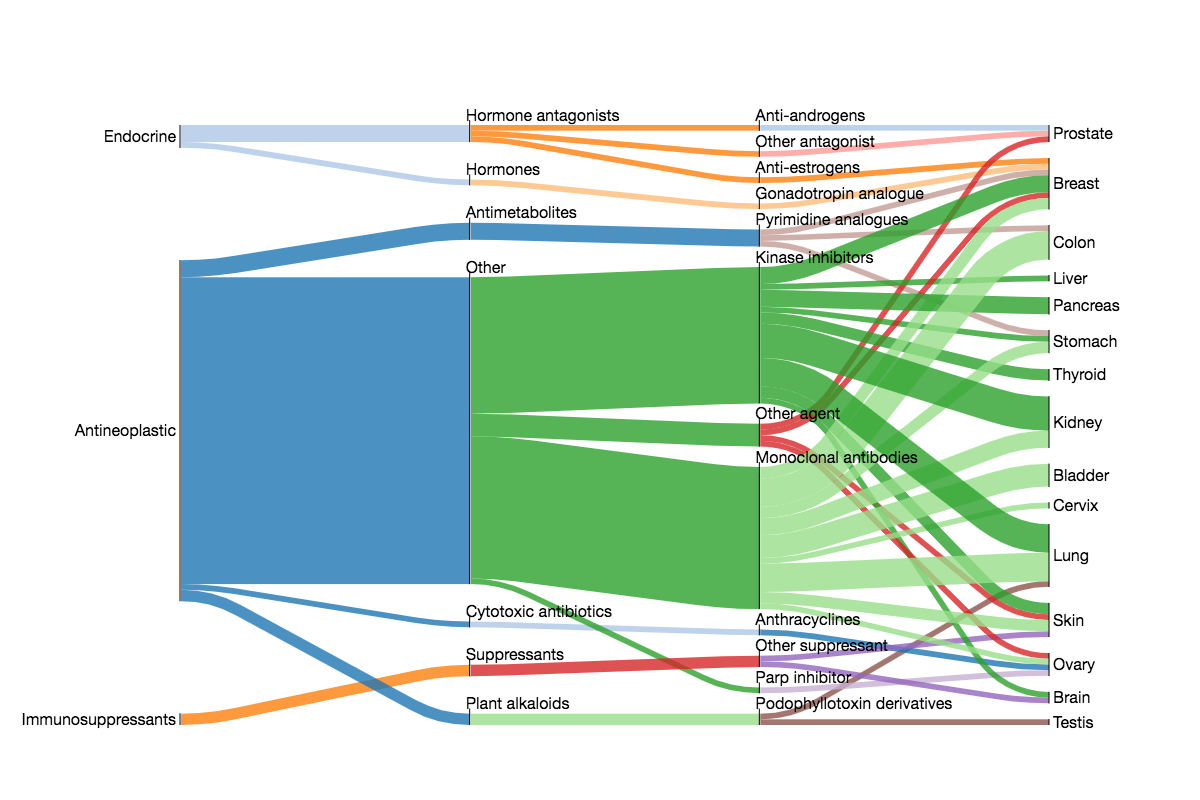

In [20]:
Image(s.png)